## Heart Disease Prediction



<h2>Objective</h2>

<p>Build a classification model that predicts heart disease in a subject. (Note the target column to predict is 'TenYearCHD' where CHD = Coronary heart disease) </p>

<h2>Attributes:</h2>
    <ol>
    <li>male: male(0) or female(1);(Nominal)</li>
    <li>age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)</li>
    <li>education</li>
    <li>currentSmoker: whether or not the patient is a current smoker (Nominal)</li>
    <li>cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)</li>
    <li>BPMeds: whether or not the patient was on blood pressure medication (Nominal)</li>
    <li>prevalentStroke: whether or not the patient had previously had a stroke (Nominal)</li>
    <li>prevalentHyp: whether or not the patient was hypertensive (Nominal)</li>
    <li>diabetes: whether or not the patient had diabetes (Nominal)</li>
    <li>totChol: total cholesterol level (Continuous)</li>
    <li>sysBP: systolic blood pressure (Continuous)</li>
    <li>diaBP: diastolic blood pressure (Continuous)</li>
    <li>BMI: Body Mass Index (Continuous)</li>
    <li>heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)</li>
    <li>glucose: glucose level (Continuous)</li>
    <li>10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) - Target Variable</li>
    </ol>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab 
%matplotlib inline


import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB




<h2>1. Read the file and display columns</h2>

In [2]:
df=pd.read_csv(r"../input/heart-disease-prediction-using-logistic-regression/framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
df.shape

(4238, 16)

In [7]:
df.columns.nunique()

16

In [8]:
df['male'].value_counts()

0    2419
1    1819
Name: male, dtype: int64

In [9]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [10]:
df['currentSmoker'].value_counts()

0    2144
1    2094
Name: currentSmoker, dtype: int64

In [11]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [12]:
df['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [13]:
df['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

In [14]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## 2. Handle missing values, Outliers and Duplicate Data

In [16]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [17]:
# percentage of missing data per category
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.155262
education,105,2.477584
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


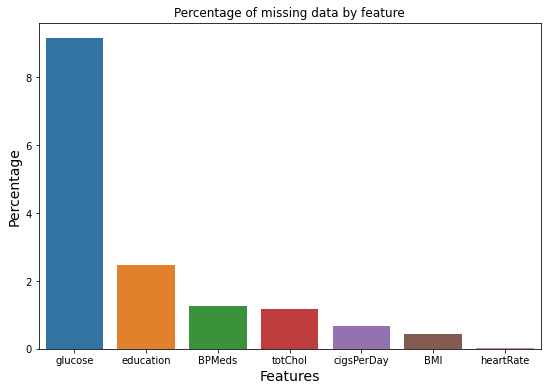

In [18]:
plt.figure(figsize=(9,6))
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 9.15%, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.


In [19]:
# we can drop education as it doesnt effect heart disease
df = df.drop(['education'], axis=1)

In [20]:
print(df.isnull().sum().sum())
df=df.dropna()
print(df.isnull().sum().sum())
df.shape

540
0


(3749, 15)

In [21]:
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

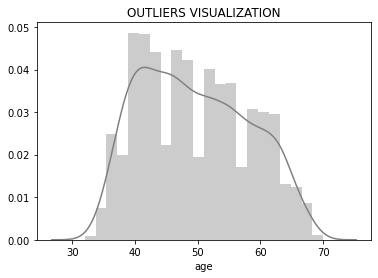

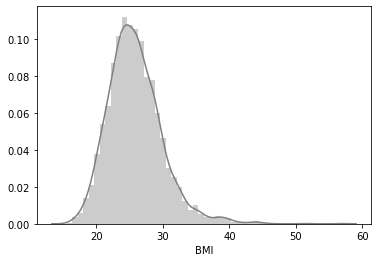

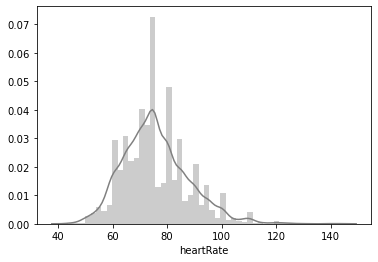

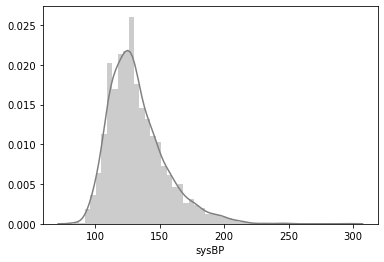

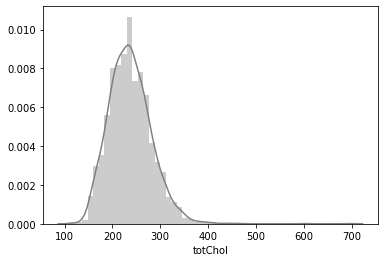

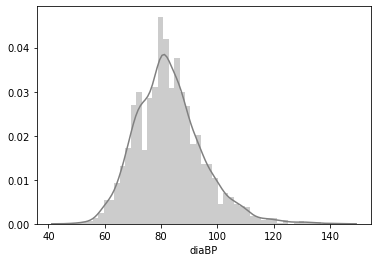

In [22]:
#Outliers
cols =['age','BMI','heartRate','sysBP','totChol','diaBP']
plt.title("OUTLIERS VISUALIZATION")
for i in cols:
    df[i]
    sns.distplot(df[i],color='grey')
    plt.show()

## 3.	Calculate  statistics and EDA of data.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,3749.0,0.445185,0.497053,0.00,0.00,0.00,1.00,1.0
age,3749.0,49.578821,8.569322,32.00,42.00,49.00,56.00,70.0
currentSmoker,3749.0,0.488397,0.499932,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3749.0,9.005335,11.922440,0.00,0.00,0.00,20.00,70.0
BPMeds,3749.0,0.030408,0.171730,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3749.0,0.005601,0.074643,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3749.0,0.311816,0.463297,0.00,0.00,0.00,1.00,1.0
diabetes,3749.0,0.027207,0.162709,0.00,0.00,0.00,0.00,1.0
totChol,3749.0,236.952787,44.610417,113.00,206.00,234.00,264.00,696.0
sysBP,3749.0,132.365964,22.051951,83.50,117.00,128.00,144.00,295.0


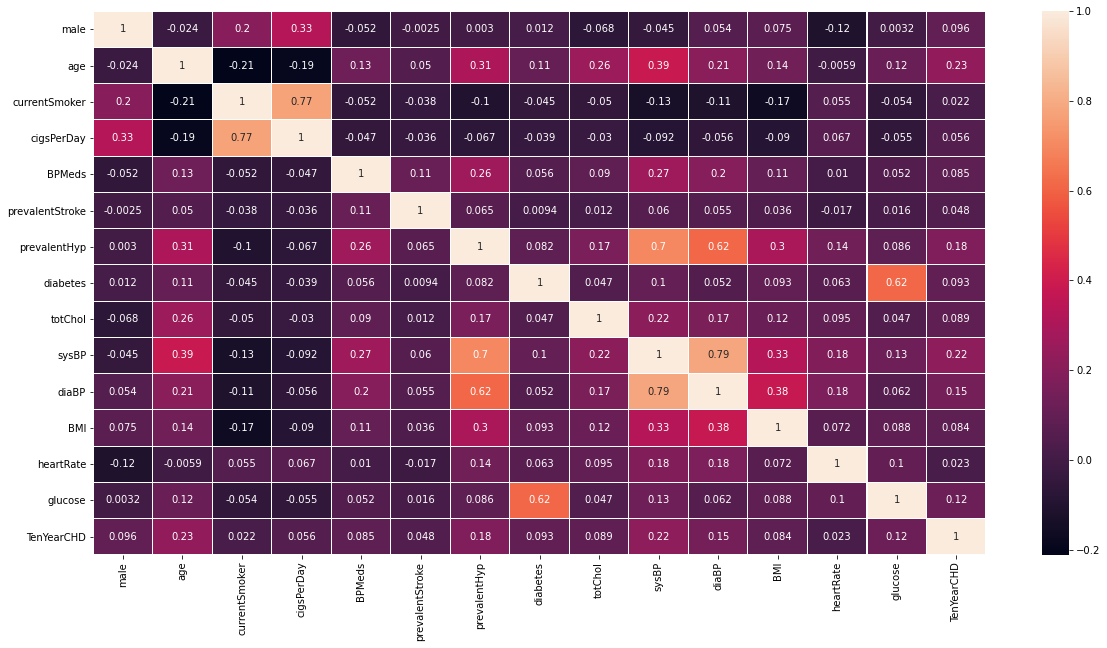

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

<h3>Observations:</h3>
<ol>
    <li>sysBP and diaBP,currentSmoker and cigsPerDay  are highly correlated with values around 0.8</li>
    <li>sysBP and diaBP and prevalentHyp, diabetes and glucose are correlated to some extent with values arouund 0.62 </li>
</ol>

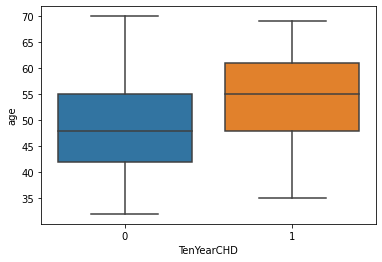

In [25]:
sns.boxplot(y='age',x='TenYearCHD',data=df)

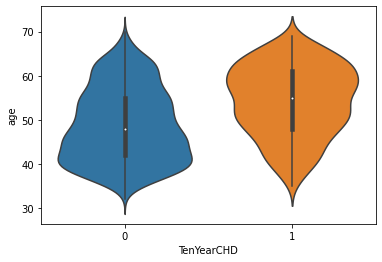

In [26]:
sns.violinplot(y='age',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>Patients who got CHD are in the age group:50- 65</li>
    <li>Patients around the age group:35- 45 does not suffer from CHD mostly</li>
</ol>

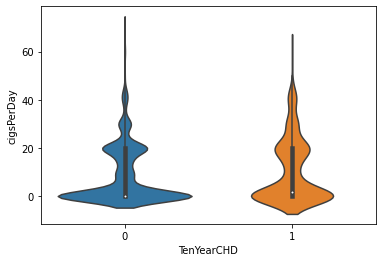

In [27]:
sns.violinplot(y='cigsPerDay',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>It's weird that patients who didn't smoke suffered from CHD</li>
    <li>More the cigarretes they smoke higher chance of getting CHD </li>
</ol>

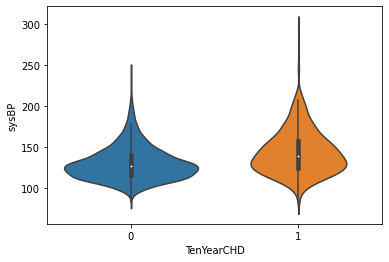

In [28]:
sns.violinplot(y='sysBP',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>Patients who have higher systole BP have higher chances of getting CHD</li>
    <li>Patients whose systole BP is around 120 are mostly safe</li>
</ol>

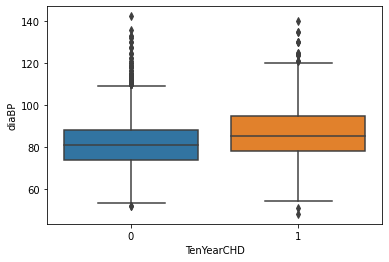

In [29]:
sns.boxplot(y='diaBP',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>Patients who have higher diastole BP have higher chances of getting CHD</li>
    <li>Patients whose diastole BP is around 75-80 are mostly safe</li>
</ol>

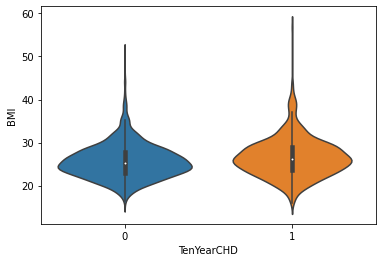

In [30]:
sns.violinplot(y='BMI',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>It seems BMI doesn't affect chance of getting CHD</li>
</ol>

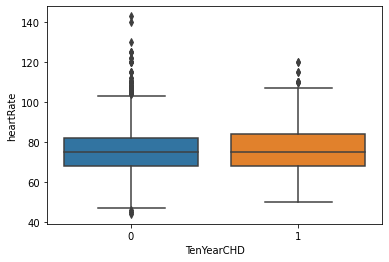

In [31]:
sns.boxplot(y='heartRate',x='TenYearCHD',data=df)

<h3>Observations:</h3>
<ol>
    <li>If your heart rate is in range of 70-80 is safe, but if their heart rate goes above or below can cause CHD</li>
</ol>

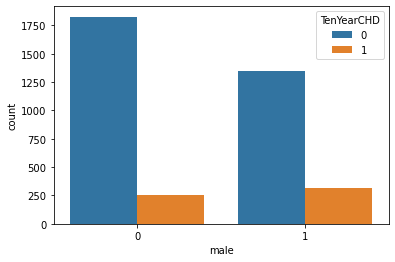

In [32]:
sns.countplot(x=df['male'], hue=df['TenYearCHD'])

<h3>Observations:</h3>
<ol>
    <li>Males are at higher risk of getting CHD</li>
</ol>

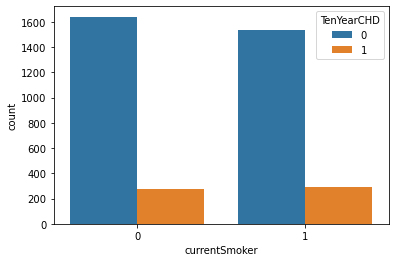

In [33]:
sns.countplot(x='currentSmoker',data=df,hue='TenYearCHD')

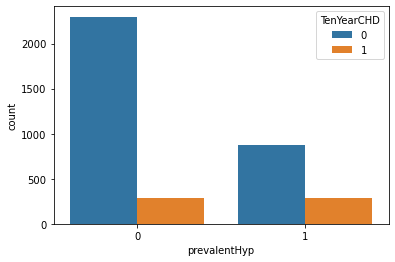

In [34]:
sns.countplot(x='prevalentHyp',data=df,hue='TenYearCHD')

<h3>Observations:</h3>
<ol>
    <li>Higher percentage of people having hypertension suffer from CHD</li>
</ol>

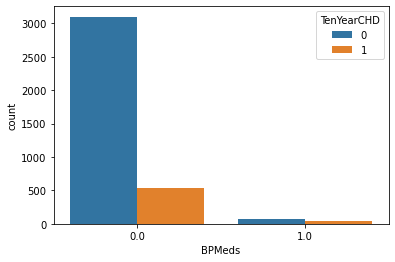

In [35]:
sns.countplot(x='BPMeds',data=df,hue='TenYearCHD')

<h3>Observations:</h3>
<ol>
    <li>It seems as if 50-60% of patients taking BP meds get CHD</li>
</ol>

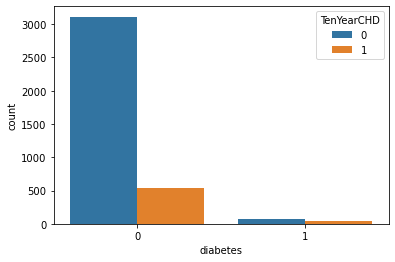

In [36]:
sns.countplot(x='diabetes',data=df,hue='TenYearCHD')

<h3>Observations:</h3>
<ol>
    <li>It seems as if 60-80% of diabetic patients  get CHD</li>
</ol>

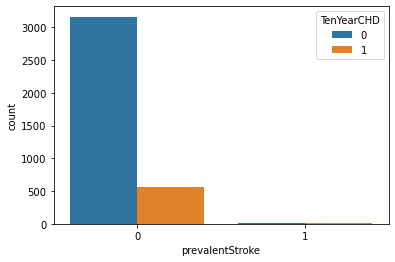

In [37]:
sns.countplot(x='prevalentStroke',data=df,hue='TenYearCHD')

<h3>Observations:</h3>
<ol>
    <li>Same here as well, it seems as if 90% of stroke patients  get CHD</li>
</ol>

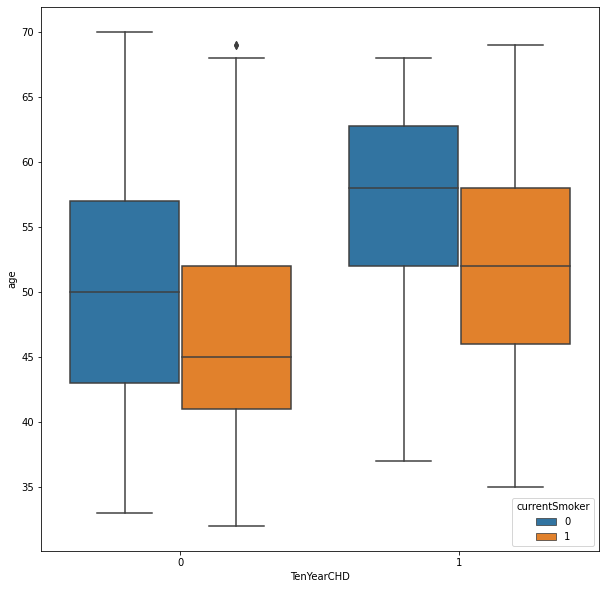

In [38]:
plt.figure(figsize=(10,10))
sns.boxplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker')

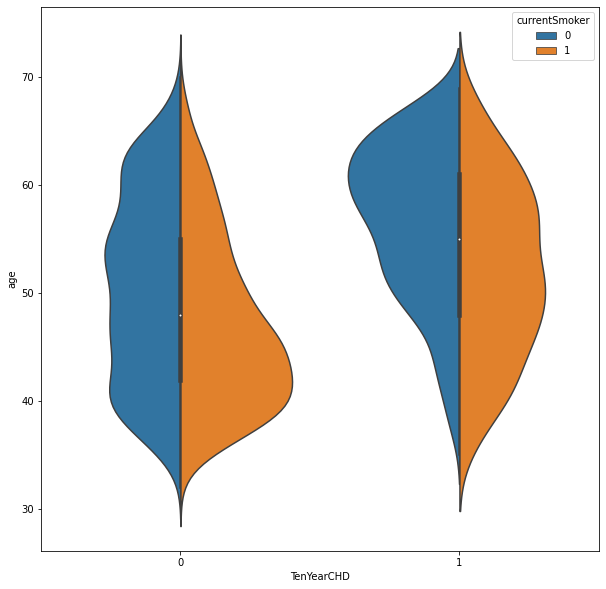

In [39]:
plt.figure(figsize=(10,10))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True)

<h3>Observations:</h3>
<ol>
    <li>We see that most of smokers having no risk of CHD are in age around 40 years</li>
    <li>most of non-smokers having risk are in age around 65-70 years</li>
    <li>most smokers having risk are in age around 50 years</li>
</ol>

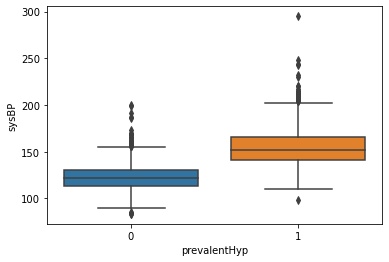

In [40]:
sns.boxplot(y='sysBP',x='prevalentHyp',data=df)

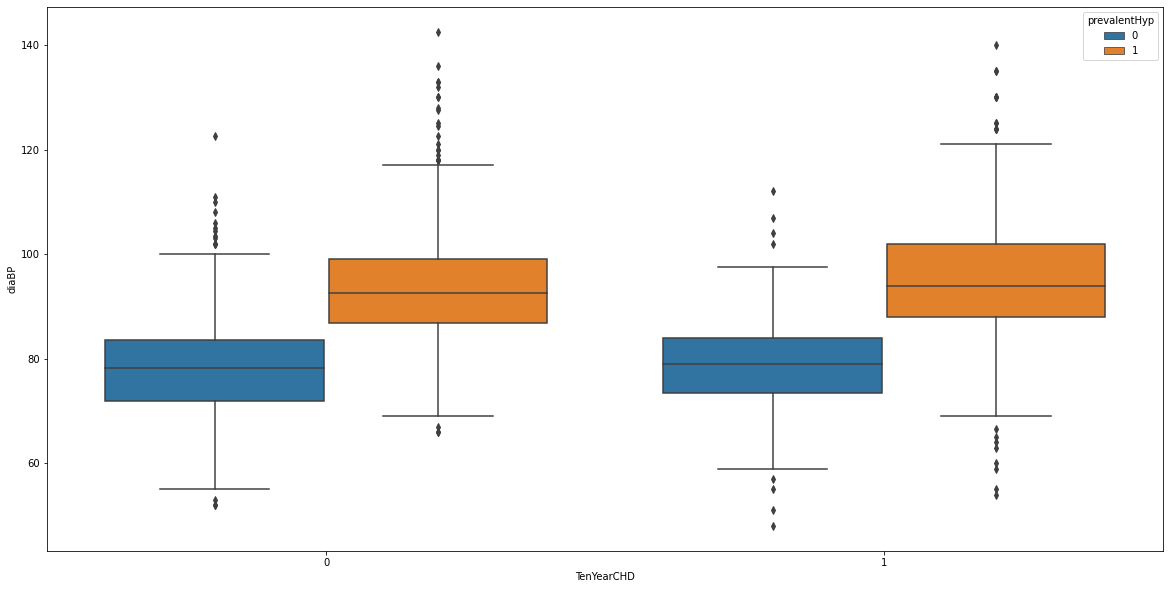

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(y='diaBP',hue='prevalentHyp',data=df,x='TenYearCHD')
#split=True combines two plots

<h3>Observations:</h3>
<ol>
    <li>Higher sysBP and diaBP, higher the risk of Hypertension, which means higher risk of CHD</li>
</ol>

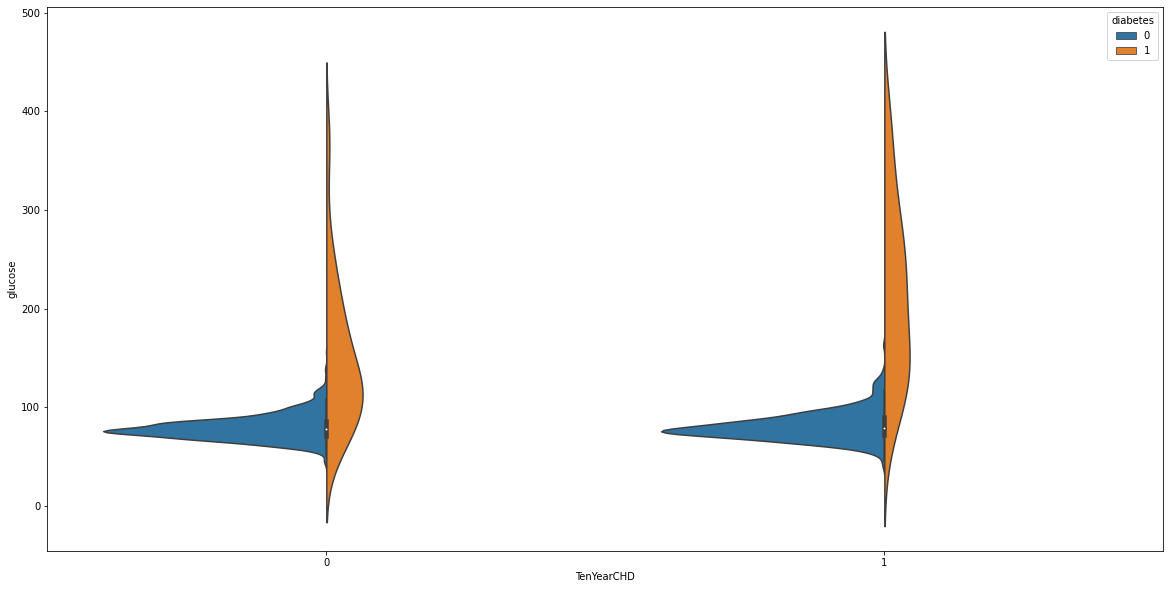

In [42]:
plt.figure(figsize=(20,10))
sns.violinplot(y='glucose',hue='diabetes',data=df,x='TenYearCHD',split=True)

<h3>Observations:</h3>
<ol>
    <li>
In diabetic patients those having higher level of glucose ranging from 200-400, have higher risk of getting CHD".

</li>
</ol>

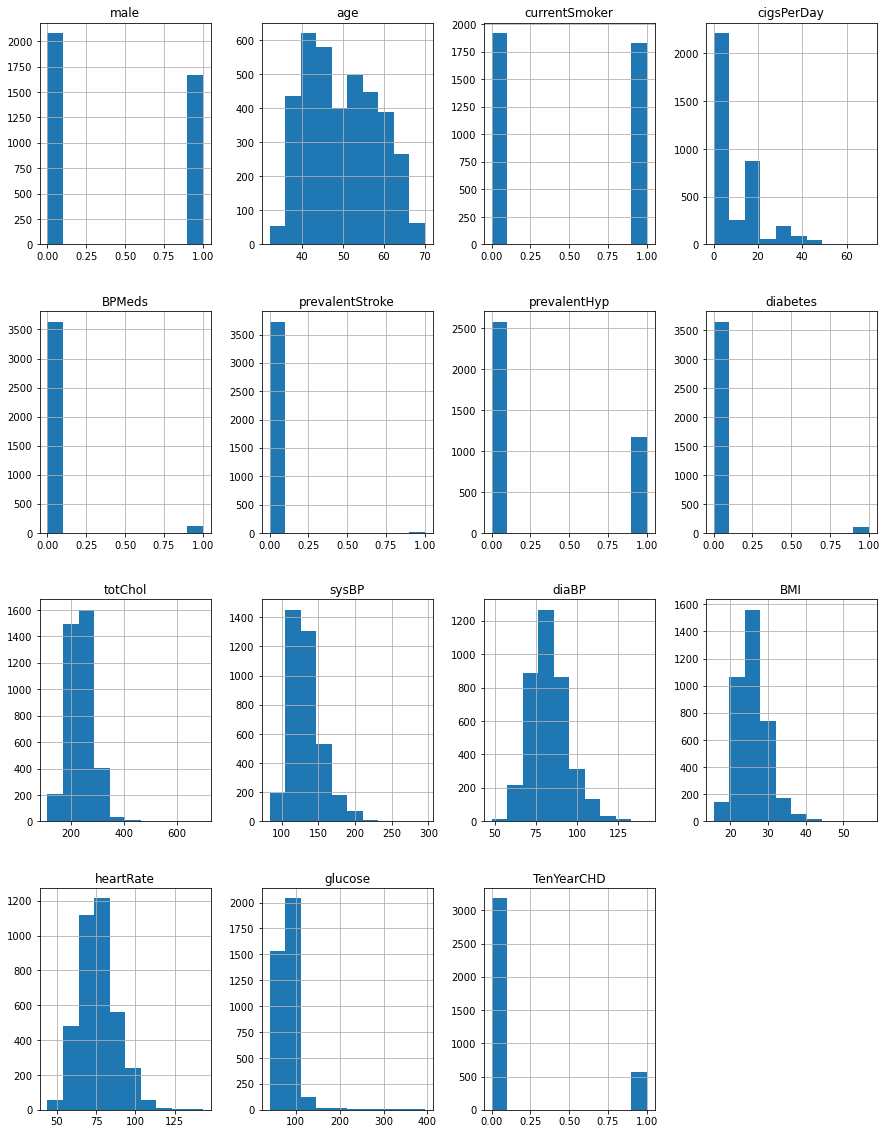

In [43]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### Observations:

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced.
The no. of cases of CHD is  in patients  suffering from prevalant Stroke/ diabetes/taking BP meds is very low compared to those not suffering from it.There is a huge gap between the two extremes of suffering and not suffering"



# Feature Selection 

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.



In [44]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(11,'Score'))  

           Specs       Score
9          sysBP  667.474699
13       glucose  402.071787
1            age  297.287121
8        totChol  251.628483
3     cigsPerDay  185.952614
10         diaBP  143.272443
6   prevalentHyp   82.461330
7       diabetes   31.671664
4         BPMeds   26.080485
0           male   19.191630
11           BMI   17.051372


In [45]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.474699
13,glucose,402.071787
1,age,297.287121
8,totChol,251.628483
3,cigsPerDay,185.952614
10,diaBP,143.272443
6,prevalentHyp,82.461330
7,diabetes,31.671664
4,BPMeds,26.080485
0,male,19.191630


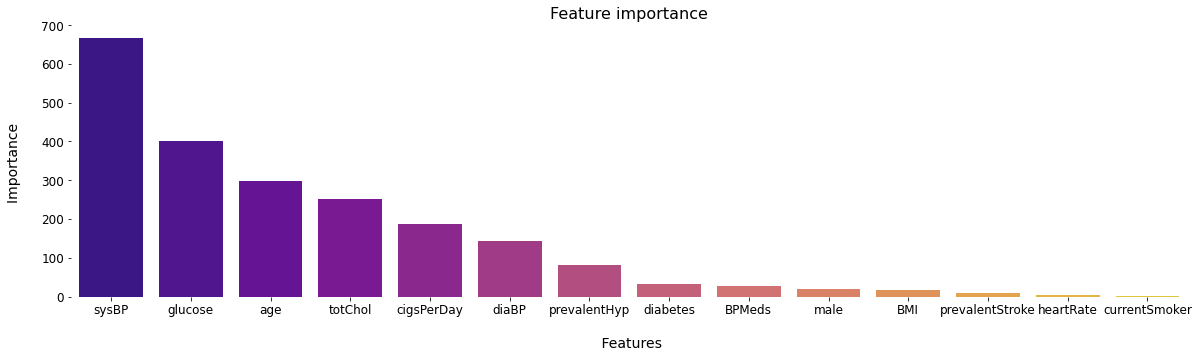

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "plasma")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Observations:
    

We can say the sysBP , Glucose ,Age are the first three important features in the data .

In [47]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

These features which have strongest relationship with the output variable are:
1. Systolic Blood Pressure
2. Glucose
3. Age
4. Cholesterin
5. Cigarettes per Day
6. Diastolic Blood Pressure
7. Hypertensive
8. Diabetes
9. Blood Pressure Medication
10. Gender

### New dataframe with selected features

In [48]:
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4231,141.0,81.0,58,187.0,0.0,81.0,1,0,0.0,1,0
4232,168.0,79.0,68,176.0,0.0,97.0,1,0,0.0,1,1
4233,179.0,86.0,50,313.0,1.0,92.0,1,0,0.0,1,1
4234,126.5,68.0,51,207.0,43.0,80.0,0,0,0.0,1,0


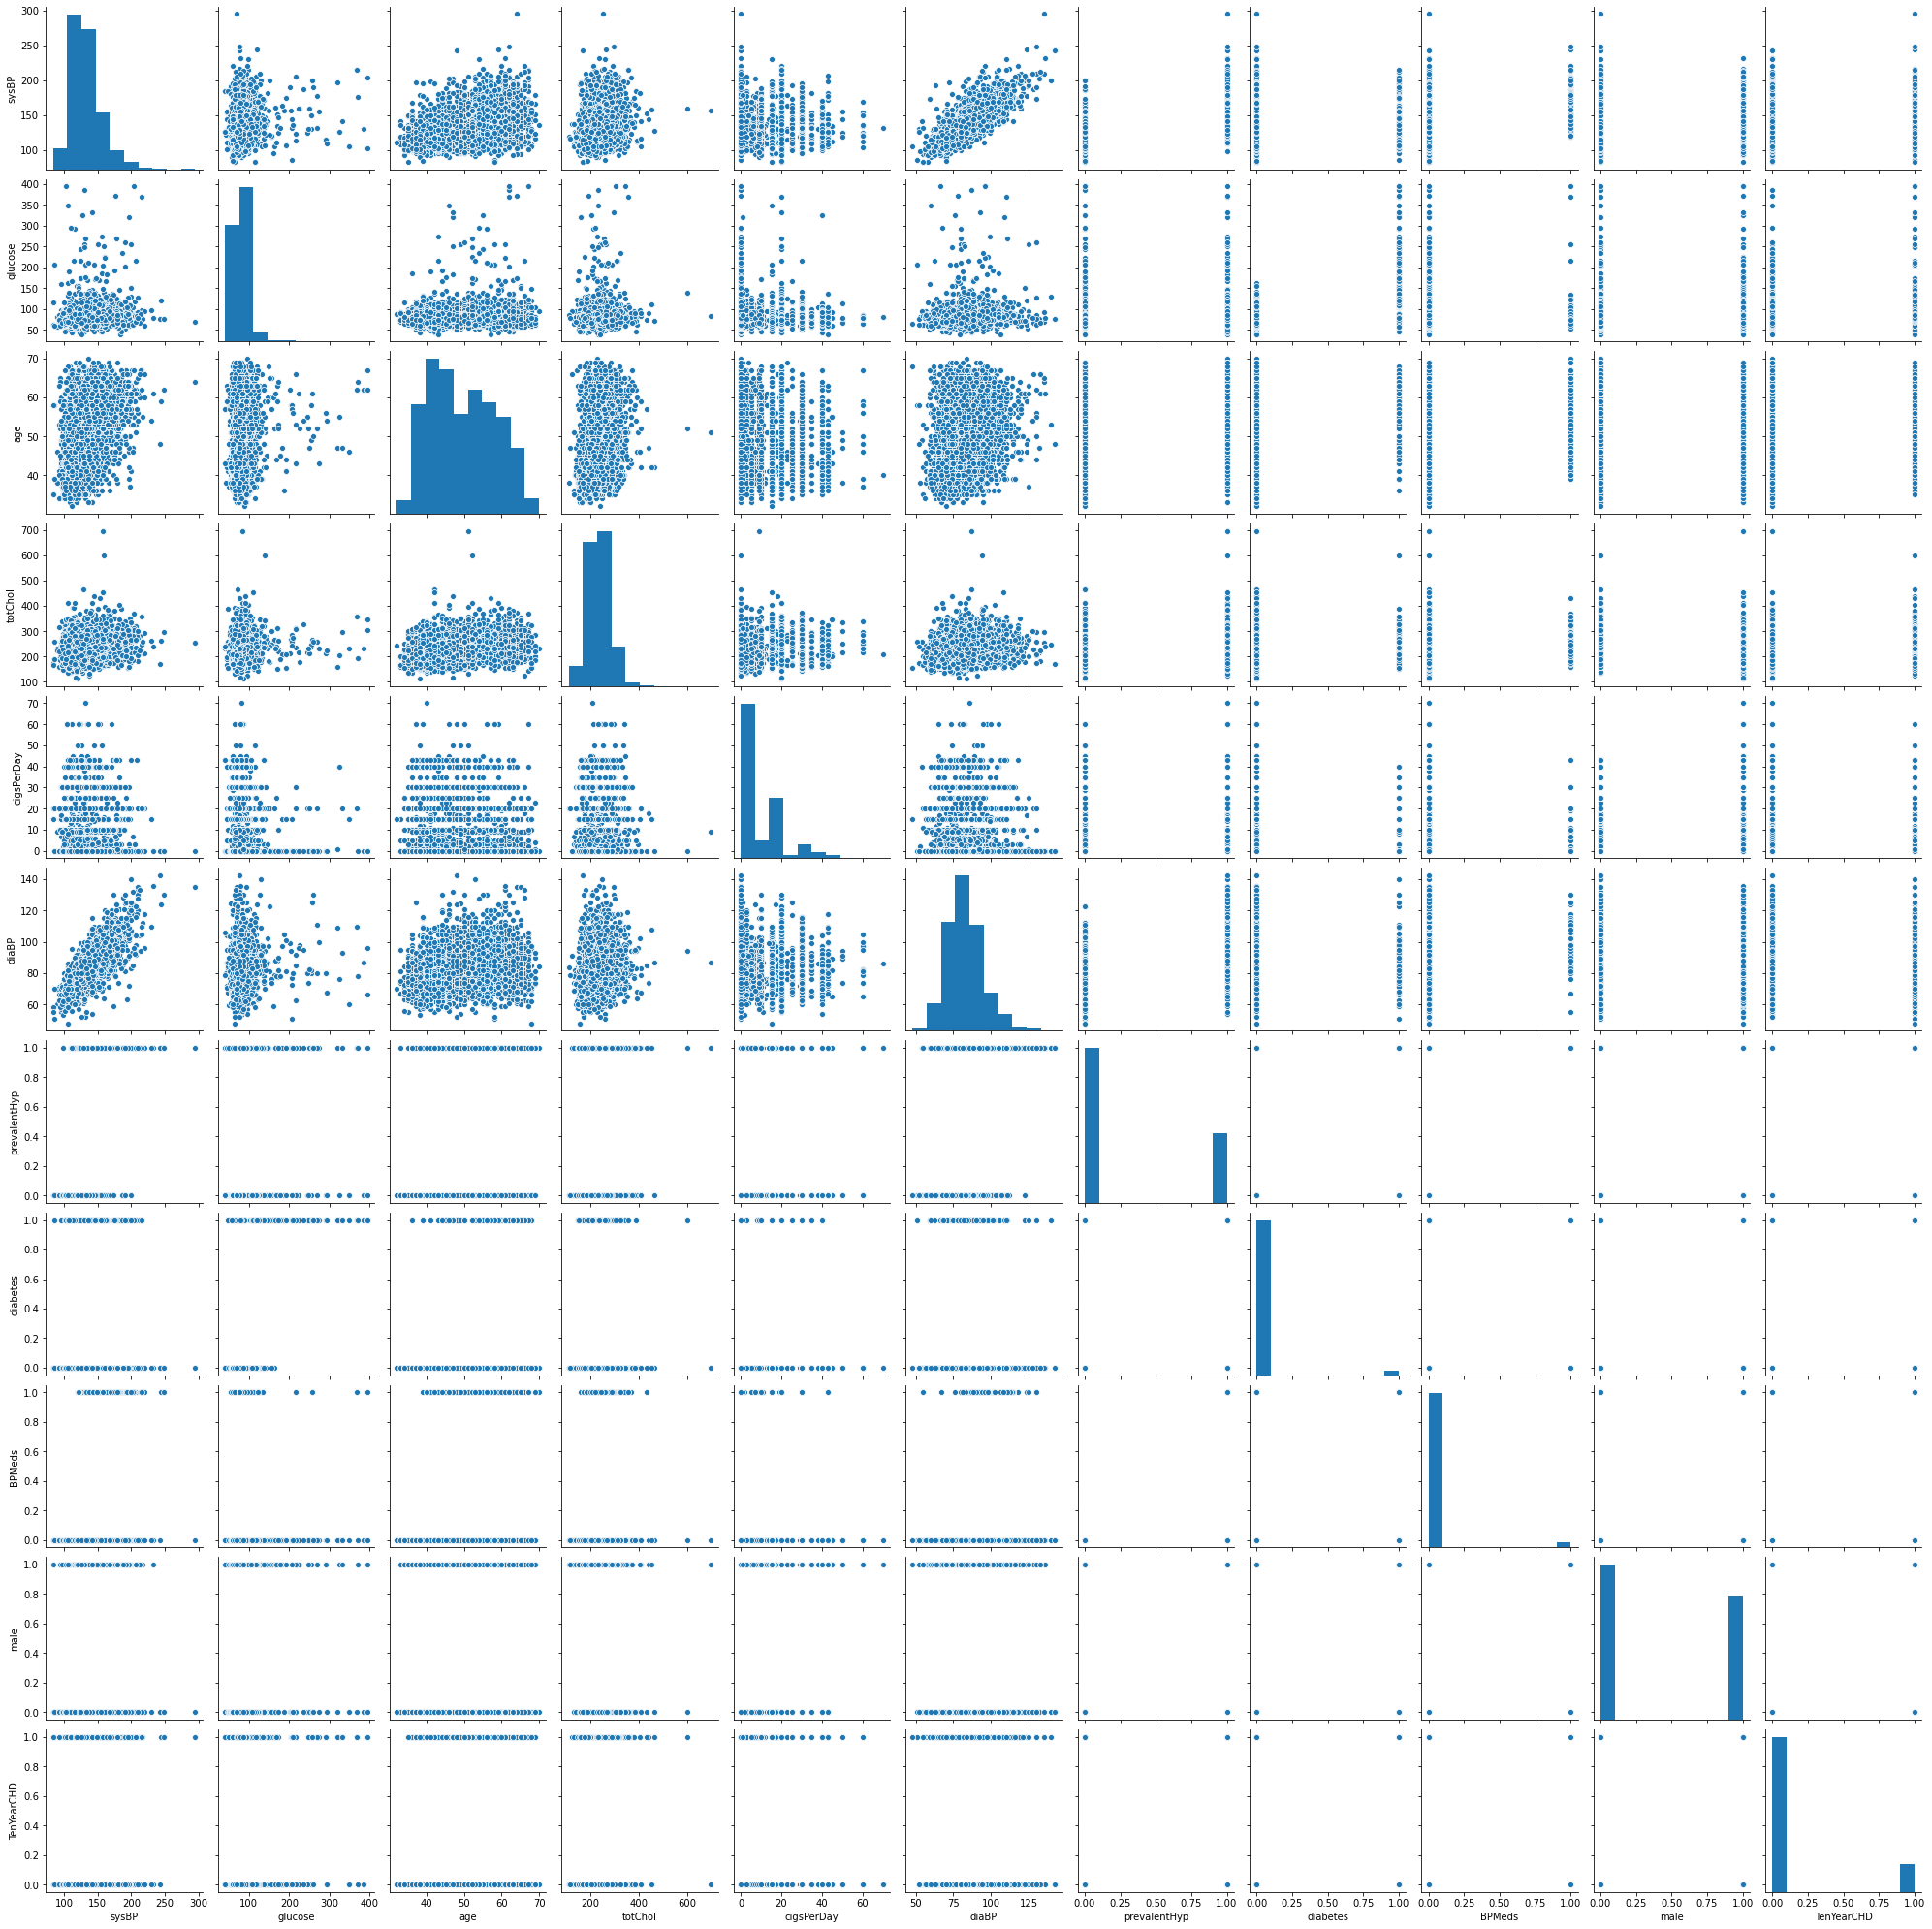

In [49]:
# Checking for outliers again
df.describe()
sns.pairplot(df)

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1
3160,157.0,84.0,51,696.0,9.0,87.0,1,0,0.0,1,0


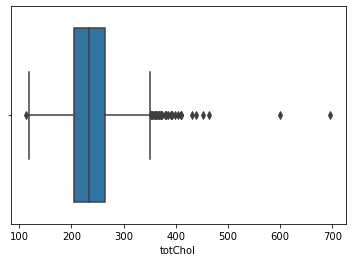

In [50]:
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

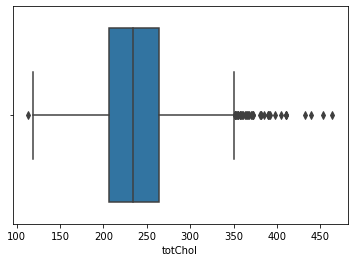

In [51]:
#Dropping 2 outliers in cholesterin
df = df.drop(df[df.totChol > 599].index)
sns.boxplot(df.totChol)

### Observations:

We have observed outliers in totChol and by specifying the range we have  dropped the 2 outliers in totChol.

In [52]:
df_clean = df

# Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [53]:
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_df= pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [54]:
scaled_df.describe()
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000,3747.000000
mean,132.352148,81.867094,49.577796,236.733387,9.007740,82.929677,0.311449,0.026955,0.030424,0.445156,0.152389
std,22.049704,23.875510,8.571487,43.585151,11.924715,11.934951,0.463148,0.161973,0.171775,0.497049,0.359445
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,143.750000,87.000000,56.000000,264.000000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,464.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


# Taining and Testing the Data

In [55]:
y = scaled_df['TenYearCHD']
X = scaled_df.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)


In [56]:
print(len(X_train))
print(len(X_test))

2248
1499


### Resampling imbalanced Dataset 

Class 0: 3176
Class 1: 571
Proportion: 5.56 : 1


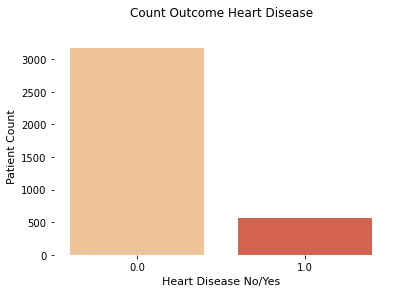

In [57]:
target_count = scaled_df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(scaled_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

### Undersampling methods

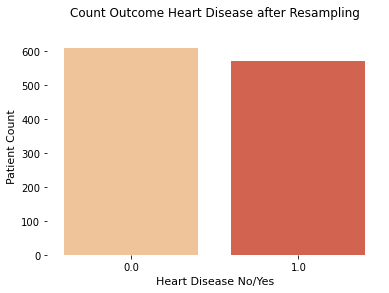

In [58]:
# Shuffle df
shuffled_df = scaled_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

# Models

### The algorithms that we  will be used are:  
1. Logistic Regression
2. k-Nearest Neighbours
3. Decision Trees
4. Support Vector Machine
5. Random Forest Classification
6. Naive Bayes

## 1. Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [59]:
#initialize model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_logreg_pred = logreg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_logreg_pred)
print(f"The accuracy score for LogisticRegression is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_logreg_pred)
print(f"The f1 score for LogisticRegression is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_logreg_pred)
print(f"The precision score for LogisticRegression is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_logreg_pred)
print(f"The recall score for LogisticRegression is: {round(recall,3)*100}%")


The accuracy score for LogisticRegression is: 84.5%
The f1 score for LogisticRegression is: 6.5%
The precision score for LogisticRegression is: 72.7%
The recall score for LogisticRegression is: 3.4000000000000004%


### Observations:
###### The accuracy score for LogisticRegression is: 84.89%
###### The f1 score for LogisticRegression is: 6.60%

## 2. KNN (k-nearest neighbors)

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [60]:
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 83.2%
The f1 score for KNN is: 10.6%
The precision score for KNN is: 33.300000000000004%
The recall score for KNN is: 6.3%


### Observations :

#####  KNearestNeighors performs best at n = 10  with a accuracy of 84.1%

##### F1 score : 12.5%

## 3. Decision Trees

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. 

In [61]:
#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_up_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_up_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_up_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_up_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_up_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 75.1%
The f1 score for DTC is: 23.7%
The precision score for DTC is: 22.900000000000002%
The recall score for DTC is: 24.5%


### Observations:
###### The accuracy score for DTC is: 74.1%
###### The f1 score for DTC is: 22.7%

## 4. Support vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [62]:
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

Observations:
The accuracy score for SVM is: 84.3%
The f1 score for SVM is: 1.7000000000000002%
The precision score for SVM is: 66.7%
The recall score for SVM is: 0.8%


### Observations:
###### The accuracy score for SVM is: 84.7%
###### The f1 score for SVM is: 1.70%

## 5. Random Forest Classification

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [63]:
rfc =  RandomForestClassifier()

#fit model
rfc.fit(X_train, y_train)

normalized_df_rfc_pred = rfc.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_rfc_pred)
print(f"The accuracy score for RFC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_rfc_pred)
print(f"The f1 score for RFC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_rfc_pred)
print(f"The precision score for RFC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_rfc_pred)
print(f"The recall score for RFC is: {round(recall,3)*100}%")

Observations:
The accuracy score for RFC is: 84.1%
The f1 score for RFC is: 13.100000000000001%
The precision score for RFC is: 48.6%
The recall score for RFC is: 7.6%


### Observations:
###### Accuracy Score : 83.89%
###### F1 score : 13.0%

## 6. Naive Bayes Algorithm

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [64]:
nb =  GaussianNB()

#fit model
nb.fit(X_train, y_train)

normalized_df_nb_pred = nb.predict(X_test)

print('Observations:')
# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_nb_pred)
print(f"The accuracy score for Naive Bayes is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_nb_pred)
print(f"The f1 score for Naive Bayes is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_nb_pred)
print(f"The precision score for Naive Bayes is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_nb_pred)
print(f"The recall score for Naive Bayes is: {round(recall,3)*100}%")




Observations:
The accuracy score for Naive Bayes is: 81.89999999999999%
The f1 score for Naive Bayes is: 28.9%
The precision score for Naive Bayes is: 38.2%
The recall score for Naive Bayes is: 23.200000000000003%


### Observations:
###### Accuracy : 81.8%
###### f1 score :  26.0%

# F1 SCORES

In [65]:
data = {'Model':['Logistic Regression','KNN','Decision Tree','SVM','Random Forest','Naive Bayes'],
        'F1 Score':[6.60,12.5,22.7,1.70,13.0,26.0],'Accuracies':[84.89,84.1,74.1,84.7,83.89,81.8],'Recall':[3.40,7.30,24.6,0.89,7.80,20.70],'Precision':[72.70,41.50,21.00,100.00,40.00,35.00]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

                 Model  F1 Score  Accuracies  Recall  Precision
0  Logistic Regression       6.6       84.89    3.40       72.7
1                  KNN      12.5       84.10    7.30       41.5
2        Decision Tree      22.7       74.10   24.60       21.0
3                  SVM       1.7       84.70    0.89      100.0
4        Random Forest      13.0       83.89    7.80       40.0
5          Naive Bayes      26.0       81.80   20.70       35.0


# Comparing the Models 

In [66]:
Accuracies=[84.89,84.1,73.2,84.7,83.89,81.8]
Accuracies

[84.89, 84.1, 73.2, 84.7, 83.89, 81.8]

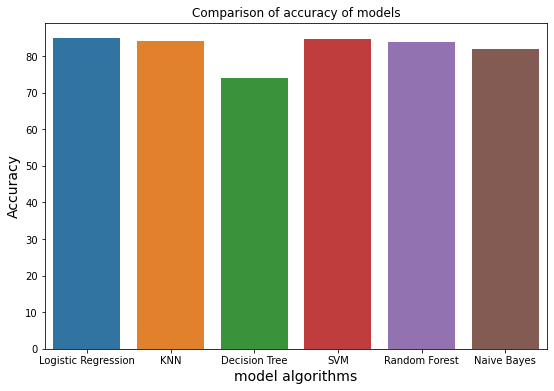

In [67]:
plt.figure(figsize=(9,6))
sns.barplot(x='Model', y='Accuracies', data = df)
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

By the above visualization we see that all the six models are being compared to eachother with respect to their accuracies .
Logistic Regression has the highest accuracy in all the models as per the observation in the above barplot.

1. Logistic Regression : 84.89%
2. KNN                 : 84.10%
3. Decision Tree       : 73.20%
4. SVM                 : 84.70%
5. Random Forest        :83.89%
6. Naive Bayes         : 81.80%

### Observations:

Logistic regression has the highest accuracy.

In [68]:
acc_test = logreg.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = logreg.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")


The accuracy score of the test data is:  84.52301534356238 %
The accuracy score of the training data is:  85.85 %


### Observations:

The scores for test and training data for the logistic regression model are similar. Therefore we do not expect the model to overfit

# Checking cross validation

Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

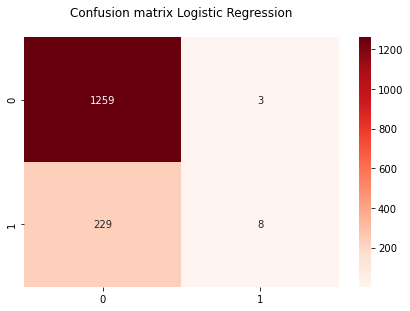

In [69]:
cnf_matrix_logreg = confusion_matrix(y_test, normalized_df_logreg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

### AU ROC CURVE LOGISTIC REGRESSION


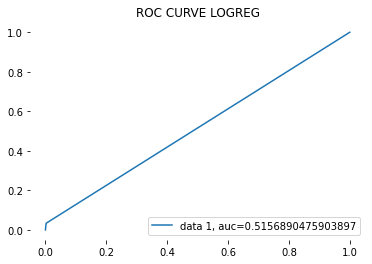

The score for the AUC ROC Curve is: 51.6%


In [70]:
fpr, tpr, _ = roc_curve(y_test, normalized_df_logreg_pred)
auc = roc_auc_score(y_test, normalized_df_logreg_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE LOGREG')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

# CONCLUSION:

#### The following results were found: 

#### DATASET :  
With the dataset that was provided, age was ranged 30-60 (majority), number of cigsperday() ranges 10-40(majority) ,sysBP ranges 100-200,glucose ranges 65-100(majority),totChol ranges 150-300. 

The above mentioned are the important features that were given by the order of highest importance with the help of Feature Selection. 

#### FINAL RESULT :
The accuracy was observed the highest at Logistic Regression with -           
 1. Accuracy of 84.89% 
 2. f1 score of 6.60%
 3. Precision of 72.7%
 4. Recall of 3.40%.
 
Therefore  Logistic Regression model is the recommended model

As observed by the visualizations,
1. Age is directly proportional to the target variable (TenYearCHD)
2. No: of cigs per day  is a major factor for predicting the heart disease .
3. Diabetic patients those having higher level of glucose ranging from 200-400, have        higher risk of getting CHD.
4. 90% of stroke patients get CHD
5. Patients who have higher systole BP have higher chances of getting CHD
6. Patients whose diastole BP is around 75-80 are mostly safe
